In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Datasets/drug200.csv")

In [3]:
data.head(4)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [4]:
df = data.copy()

In [5]:
df.head(4)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.shape

(200, 6)

In [9]:
df.duplicated().sum()

0

In [10]:
numerical_feature = df.columns[data.dtypes != 'object']
categorical_feature = df.columns[data.dtypes == 'object']

In [11]:
numerical_feature

Index(['Age', 'Na_to_K'], dtype='object')

In [12]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [13]:
# Categorical Variable

In [14]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [15]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [16]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [17]:
df['Drug'].value_counts()
# It can be seen that from results above, DrugY has more amount than other types of drugs

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [18]:
# Numerical Variable

In [19]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [20]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [21]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


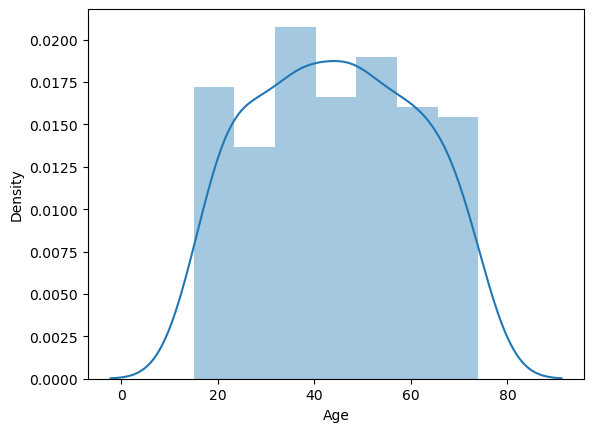

In [22]:
sns.distplot(df['Age']);

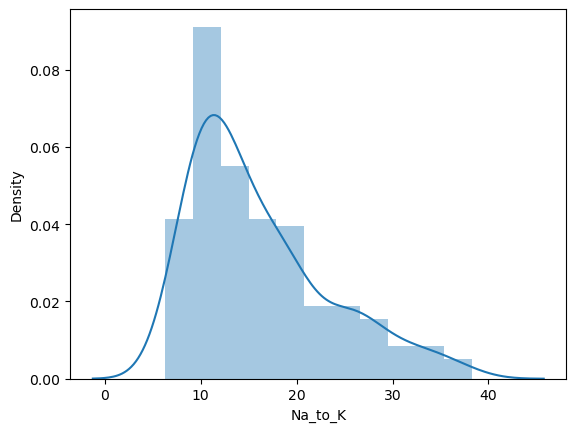

In [23]:
sns.distplot(df['Na_to_K']);

In [24]:
# EDA

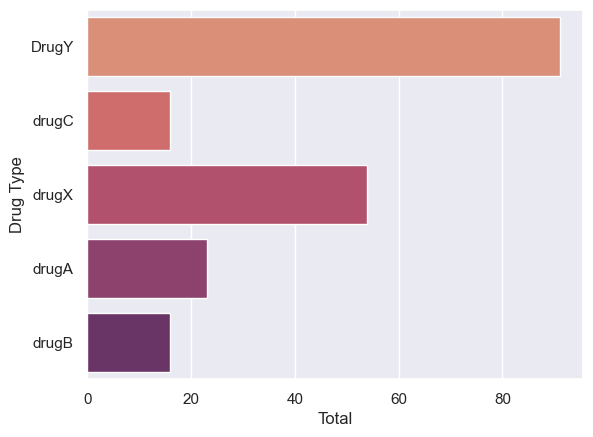

In [25]:
# Drug Type Distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

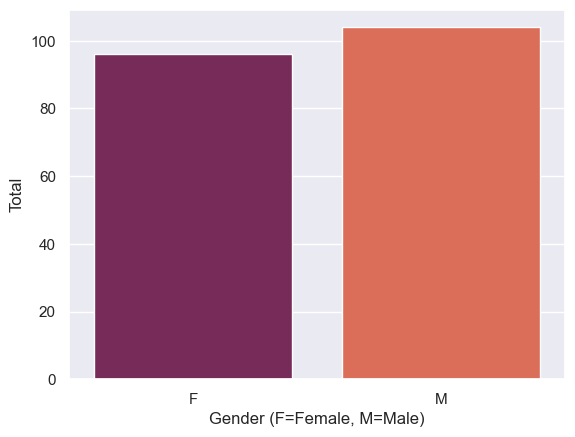

In [26]:
# Gender Distribution

sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

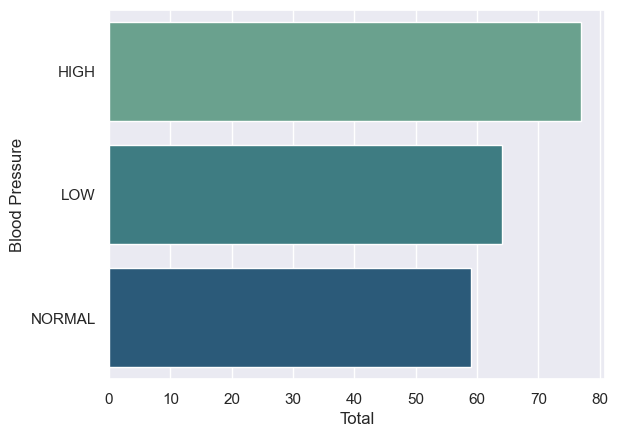

In [27]:
# Blood Pressure Distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

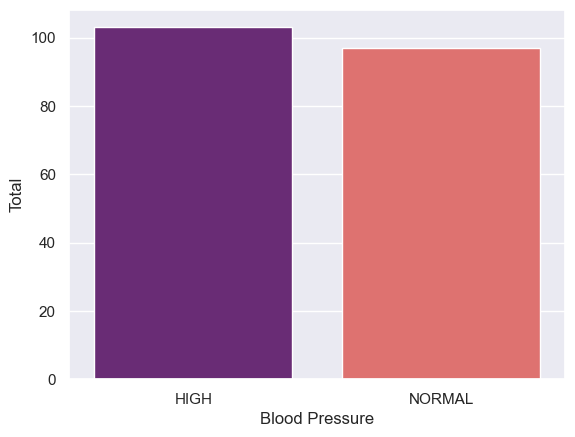

In [28]:
# Cholesterol Distribution
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

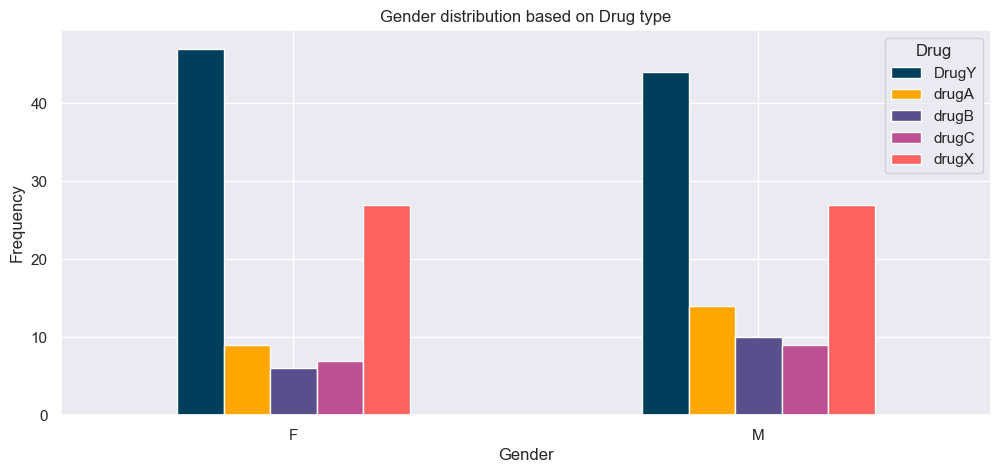

In [29]:
# Gender Distribution on Drug type
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

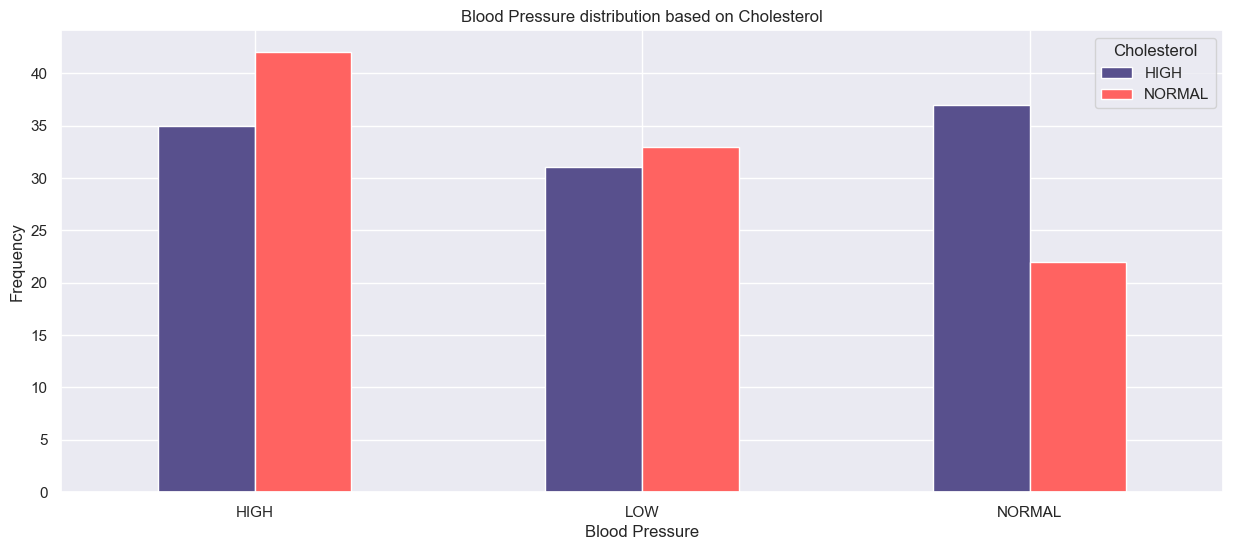

In [30]:
# Blood Pressure Distribution on on Cholesterol
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#58508d','#ff6361'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

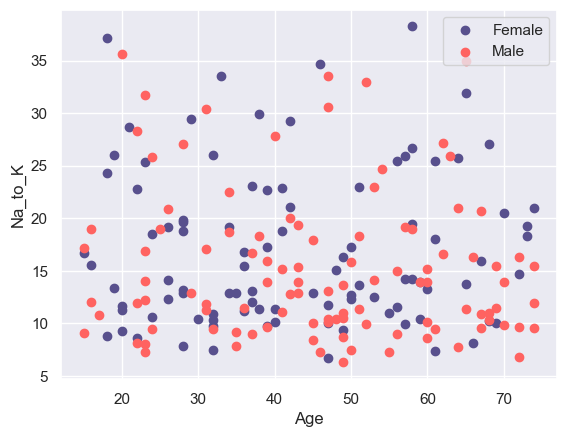

In [31]:
# SOdium to Potassium Distribution on Gender & Age
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="#58508d")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="#ff6361")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

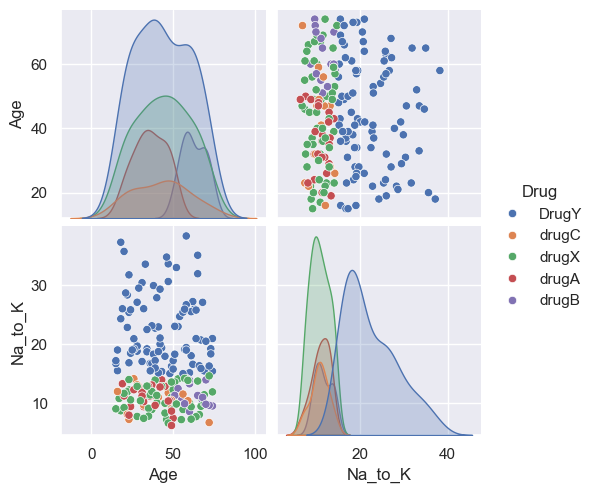

In [32]:
sns.pairplot(df, hue= 'Drug',vars = numerical_feature)

In [33]:
df.to_csv("Datasets/CleanData.csv",index=False)